# 19BCE245 - Aayush Shah

- Inverse log transformation
- Log tranformation
- Gamma transformation (power log)
  - less then 1
  - greater then 1
  > appropriate c value
- contrast stretching

## Importing necessary libraries

In [6]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [3]:
# return list of images from a given folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

### Log Transformation

In [4]:
# can be applied in images where low pixel values are more than higher ones.
def log_transformation(image):
    c = 255/np.log(1+np.max(image))
    log_image = c * np.log(1+image)
    log_image = np.array(log_image, dtype = np.uint8) # converting float to int
    return log_image

### Inverse Log Transformation

In [50]:
def inverse_log_transformation(image):
    c_inv = 255/(np.log(1+np.max(image)))
    inverse_log_image = np.exp(image**1/c_inv)-1
    inverse_log_image = np.array(inverse_log_image, dtype = np.uint8)
    return inverse_log_image

### Gamma Transformation

In [53]:
# for bright images
def gamma_transformation(image):
    gamma = 0.1
    gamma_corrected_image = np.array(255* (image/255) ** gamma, dtype='uint8')
    return gamma_corrected_image

### Gamma Transformation

In [57]:
def pixel_mapping(pixel, r1, s1, r2, s2):
    if 0<=pixel and pixel<=r1:
        return (s1/r1) * pixel
    elif r1<pixel and pixel<=r2:
        return ((s2-s1)/(r2-r1)) * (pixel-r1) + s1
    else:
        return ((255-s2)/(255-r2)) * (pixel-2) + s2

def contrast_stretching(image):
    r1 = 70
    s1 = 0
    r2 = 140
    s2 = 255
    pixel_mapped_vector = np.vectorize(pixel_mapping)
    contrast_stretched_image = pixel_mapped_vector(image, r1, s1, r2, s2)
    return contrast_stretched_image

In [70]:
def display_result(images, func):
    counter = 1
    for image in images:
        ax1 = plt.subplot(len(images),2,counter)
        ax1.imshow(image, cmap="gray")
        ax1.set_title("Original Image") 
        ax2 = plt.subplot(len(images),2,counter+1)
        ax2.imshow(func(image), cmap="gray")
        ax2.set_title("Tranformed Image")
        counter+=2
    plt.show()

In [43]:
def display_result1(images, func):
    counter = 0
    fig, axs = plt.subplots(len(images), 2, subplot_kw=dict(projection="polar"))
    for image in images:
        # print(counter)
        axs[counter, 0].imshow(image, cmap="gray")
        axs[counter, 0].set_title("Original Image") 
        axs[counter, 1].imshow(func(image), cmap="gray")
        axs[counter, 1].set_title("Tranformed Image")
        counter+=1
    plt.show()

In [67]:
images = load_images_from_folder('./images')

In [68]:
for image in images:
    cv2_imshow(image)

SyntaxError: ignored

## Outputs : 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


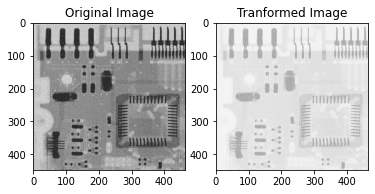

In [45]:
# log transformation
ax1 = plt.subplot(1,2,1)
ax1.imshow(images[0], cmap="gray")
ax1.set_title("Original Image") 
ax2 = plt.subplot(1,2,2)
ax2.imshow(log_transformation(images[0]), cmap="gray")
ax2.set_title("Tranformed Image")
plt.show()

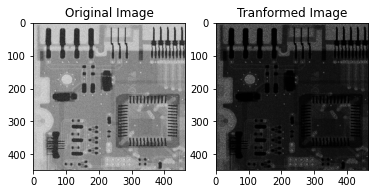

In [51]:
# inverse log transformation
ax1 = plt.subplot(1,2,1)
ax1.imshow(images[0], cmap="gray")
ax1.set_title("Original Image") 
ax2 = plt.subplot(1,2,2)
ax2.imshow(inverse_log_transformation(images[0]), cmap="gray")
ax2.set_title("Tranformed Image")
plt.show()

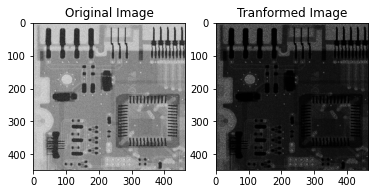

In [58]:
# inverse log transformation
ax1 = plt.subplot(1,2,1)
ax1.imshow(images[0], cmap="gray")
ax1.set_title("Original Image") 
ax2 = plt.subplot(1,2,2)
ax2.imshow(inverse_log_transformation(images[0]), cmap="gray")
ax2.set_title("Tranformed Image")
plt.show()

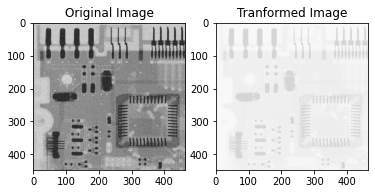

In [55]:
# gamma transformation
ax1 = plt.subplot(1,2,1)
ax1.imshow(images[0], cmap="gray")
ax1.set_title("Original Image") 
ax2 = plt.subplot(1,2,2)
ax2.imshow(gamma_transformation(images[0]), cmap="gray")
ax2.set_title("Tranformed Image")
plt.show()

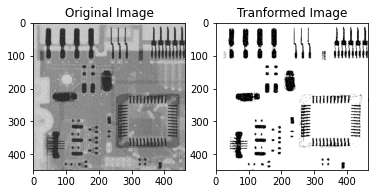

In [59]:
# contrast stretching transformation
ax1 = plt.subplot(1,2,1)
ax1.imshow(images[0], cmap="gray")
ax1.set_title("Original Image") 
ax2 = plt.subplot(1,2,2)
ax2.imshow(contrast_stretching(images[0]), cmap="gray")
ax2.set_title("Tranformed Image")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


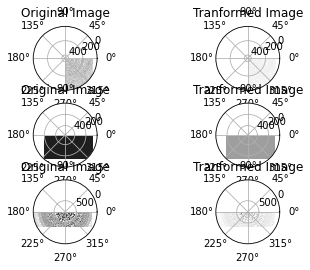

In [61]:
display_result1(images, log_transformation)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


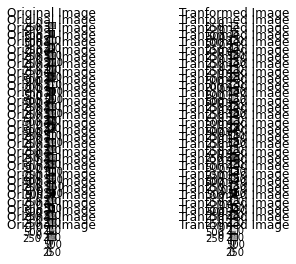

In [71]:
display_result(images, log_transformation)